In [1]:
#Import Old DataFrame
import pickle
from pathlib import Path
data_folder = Path('Z:\\Maxime Chevee\Maxime 3\Analysis\Analysis OptoTagged 20180411')
file_to_open = data_folder / "master_log_lite.pkl"
with open(file_to_open, 'rb') as f:
   master_log = pickle.load(f, encoding='latin1')

In [2]:
import numpy as np
import pandas as pd
trial_types = list(master_log['Stim/Block/Response'].unique())  #Create a list of all trial types: SomHit, SomMiss, etc.
mouse_uni = np.unique(master_log.mouse_name)  #Create a list of all mouse names: Cl4, Cl5, etc.
date_uni = np.unique(master_log.date)  #Create a list of all dates: 05-23-2017, etc.

#Sub-DataFrame for individual mouse & Dictionary for session and numbers for specific trial types
session = {}
for i in range(0, len(mouse_uni)):  #Loop through each mouse
    for j in range(0, len(date_uni)):  #For each mouse, loop through all dates
        sub = master_log[(master_log.mouse_name == mouse_uni[i][0]) & (master_log.date == date_uni[j][0])]  #Create sub-dataFrame for one mouse and one date 
        if (sub.empty == False):
            #Append a list containing the number of SomHit, SomMiss, etc. for the given mouse on the given date to the dictionary Session
            session[str(mouse_uni[i][0])+','+str(date_uni[j][0])] = [len(sub[(sub['Stim/Block/Response'] == trial_types[0]) & (sub.cluster_name == sub.cluster_name[sub.cluster_name.index[0]][0])]),
                                                                     len(sub[(sub['Stim/Block/Response'] == trial_types[1]) & (sub.cluster_name == sub.cluster_name[sub.cluster_name.index[0]][0])]),
                                                                     len(sub[(sub['Stim/Block/Response'] == trial_types[2]) & (sub.cluster_name == sub.cluster_name[sub.cluster_name.index[0]][0])]),
                                                                     len(sub[(sub['Stim/Block/Response'] == trial_types[3]) & (sub.cluster_name == sub.cluster_name[sub.cluster_name.index[0]][0])]),
                                                                     len(sub[(sub['Stim/Block/Response'] == trial_types[4]) & (sub.cluster_name == sub.cluster_name[sub.cluster_name.index[0]][0])]),
                                                                     len(sub[(sub['Stim/Block/Response'] == trial_types[5]) & (sub.cluster_name == sub.cluster_name[sub.cluster_name.index[0]][0])]),
                                                                     len(sub[(sub['Stim/Block/Response'] == trial_types[6]) & (sub.cluster_name == sub.cluster_name[sub.cluster_name.index[0]][0])]),
                                                                     len(sub[(sub['Stim/Block/Response'] == trial_types[7]) & (sub.cluster_name == sub.cluster_name[sub.cluster_name.index[0]][0])])]


In [3]:
session #Test the variable session

{'Cl4,05-19-17': [27, 12, 67, 43, 20, 38, 42, 19],
 'Cl4,05-23-17': [21, 19, 58, 71, 8, 40, 53, 22],
 'Cl4,05-24-17': [17, 11, 32, 36, 25, 56, 55, 13],
 'Cl4,05-25-17': [28, 20, 64, 52, 10, 49, 52, 11],
 'Cl4,05-26-17': [28, 10, 40, 24, 10, 61, 59, 20],
 'Cl4,05-31-17': [31, 5, 58, 35, 26, 63, 49, 9],
 'Cl4,06-02-17': [50, 2, 74, 37, 31, 49, 18, 3],
 'Cl4,06-03-17': [20, 7, 52, 32, 33, 65, 45, 9],
 'Cl4,06-05-17': [18, 17, 70, 67, 21, 44, 28, 4],
 'Cl4,06-08-17': [14, 17, 58, 61, 8, 22, 28, 8],
 'Cl4,06-09-17': [10, 23, 40, 42, 14, 42, 59, 28],
 'Cl5,05-25-17': [15, 24, 60, 56, 13, 45, 45, 13],
 'Cl5,05-31-17': [4, 15, 13, 50, 23, 52, 42, 13],
 'Cl5,06-02-17': [16, 10, 34, 27, 18, 45, 40, 7],
 'Cl5,06-04-17': [20, 27, 49, 62, 9, 57, 69, 19],
 'Cl5,06-05-17': [18, 16, 28, 35, 25, 56, 68, 9],
 'Cl5,06-09-17': [2, 33, 41, 77, 10, 48, 51, 21],
 'Cl5,06-12-17': [4, 14, 14, 36, 13, 50, 70, 18],
 'Cl6,10-24-17': [18, 17, 54, 63, 19, 66, 60, 23],
 'Cl6,10-25-17': [16, 19, 63, 67, 13, 32, 48, 1

In [12]:
#Create a dictionary with trial types and ratios
session_ratio = {}
for i in session:  #Loop through every key (equivalent to each session) in Session, ex. 'Cl4,05-19-17'
    if sum(session[i][0:4]) != 0 or sum(session[i][4:8]) != 0:  #Prevent division by zero
        #Calculate the fractions of each trial type for visual and somatosensory trials
        session_ratio[i] = [session[i][0]/sum(session[i][0:4]),
                      session[i][1]/sum(session[i][0:4]),
                      session[i][2]/sum(session[i][0:4]),
                      session[i][3]/sum(session[i][0:4]),
                      session[i][4]/sum(session[i][4:8]),
                      session[i][5]/sum(session[i][4:8]),
                      session[i][6]/sum(session[i][4:8]),
                      session[i][7]/sum(session[i][4:8])]
#Create a list that contains the mean ratios of each trial type
means = []
for count in range(0, len(trial_types)):  #Loop through each trial type
    temp = []
    for i in session_ratio:  #Loop through each session
        temp.append(session_ratio[i][count])  #Append ratios relevant to specific trial type from all sessions to list
    means.append(np.mean(temp))  #Calculate mean of each trial type

#Create a list that contains the standard errors of each trial type
err = []
for count in range(0, len(trial_types)):  #Loop through each trial type
    temp = []
    for i in session_ratio:
        temp.append(session_ratio[i][count])  #Append ratios relevant to specific trial type from all sessions to list
    err.append(np.std(temp)/np.sqrt(len(temp)))  #Calculate error of each trial type
    #NOTE MC 20190813: I added /np.sqrt(len(temp)) because we want to plot the SEM, not the std

In [11]:
temp

[0.15966386554621848,
 0.17886178861788618,
 0.087248322147651,
 0.09016393442622951,
 0.13333333333333333,
 0.061224489795918366,
 0.0297029702970297,
 0.05921052631578947,
 0.041237113402061855,
 0.12121212121212122,
 0.1958041958041958,
 0.11206896551724138,
 0.1,
 0.06363636363636363,
 0.12337662337662338,
 0.056962025316455694,
 0.16153846153846155,
 0.11920529801324503,
 0.13690476190476192,
 0.1388888888888889,
 0.08064516129032258,
 0.0707070707070707,
 0.037037037037037035,
 0.05952380952380952,
 0.025,
 0.0979020979020979,
 0.0707070707070707,
 0.11585365853658537,
 0.050314465408805034,
 0.058823529411764705]

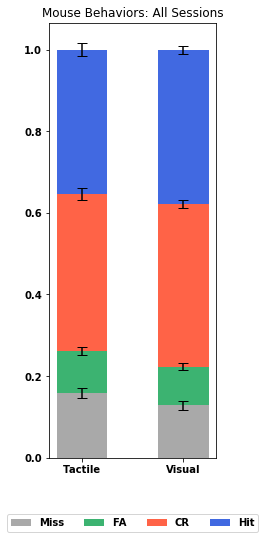

In [13]:
#Create bar-plots corresponding to the means of trial types
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
rc('font',weight='bold')
bars1 = [means[0], means[4]]
err1 = [err[0], err[4]]
bars2 = [means[1], means[7]]
err2 = [err[1], err[7]]
bars3 = [means[2], means[5]]
err3 = [err[2], err[5]]
bars4 = [means[3], means[6]]
err4 = [err[3], err[6]]
bars12 = np.add(bars1, bars2).tolist()
bars123 = np.add(bars12, bars3).tolist()
pos = ['Tactile','Visual']
barWidth = 0.5
plt.figure(figsize=(3,8))
p1 = plt.bar(pos, bars1, width=barWidth, color='darkgrey', yerr=err1, capsize=5, ecolor='black')
p2 = plt.bar(pos, bars2, bottom=bars1, width=barWidth, color='mediumseagreen', yerr=err2, capsize=5, ecolor='black')
p3 = plt.bar(pos, bars3, bottom=bars12, width=barWidth, color='tomato', yerr=err3, capsize=5)
p4 = plt.bar(pos, bars4, bottom=bars123, width=barWidth, color='royalblue', yerr=err4, capsize=5)
plt.legend((p1[0],p2[0],p3[0],p4[0]), ('Miss','FA','CR','Hit'),ncol=4,bbox_to_anchor=(0.5,-0.15),loc='center')
plt.title('Mouse Behaviors: All Sessions')
plt.savefig('Claustrum456_TrialSummary.pdf')

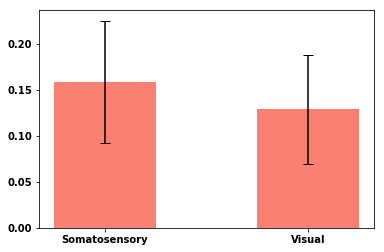